# Load libraries

In [43]:
import pandas as pd
#from sklearn.cross_validation import KFold,StratifiedKFold
#import datetime
import numpy as np
#from sklearn import linear_model
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,TruncatedSVD
import seaborn as sns
#import seaborn as sns
#import pickle
#from sklearn import metrics
#import sys

import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

%matplotlib inline

#  
#  
# Load data

In [4]:
df = pd.read_csv('data/cs-training.csv')

In [5]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.rename(columns={df.columns[0]:'id'}, inplace=True)

In [7]:
df.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
len(df)

150000

#  
#  
# Check nans

In [9]:
features_with_nan = []
for c in df.columns:
    nan_count = len(df[df[c].isnull()])
    if nan_count>0:
        features_with_nan.append(c)
        print(c, nan_count, 1.0*nan_count/len(df))
        
print(features_with_nan)

MonthlyIncome 29731 0.19820666666666667
NumberOfDependents 3924 0.02616
['MonthlyIncome', 'NumberOfDependents']


#  
#  
# Get an idea of the target variable

In [10]:
df.groupby("SeriousDlqin2yrs").count()[['id']]/len(df)

,id
SeriousDlqin2yrs,
0,0.93316
1,0.06684


#  
#  
# Get an idea of the features

### Pairplot

In [20]:
#sns.pairplot(df[[c for c in df.columns if c not in features_with_nan]], hue="SeriousDlqin2yrs")

In [19]:
couples = []
features = [c for c in df.columns if c not in ['id','SeriousDlqin2yrs']]
for f1 in features:
    for f2 in features:
        if (f1!=f2) & ((f1,f2) not in couples) & ((f2,f1) not in couples):
            couples.append((f1,f2))
            plt.figure(figsize=(10,10))
            plt.scatter(df[f1],
                        df[f2],
                        c=df["SeriousDlqin2yrs"],
                        edgecolor='None',
                        alpha=0.5)
            plt.title(str(f1)+'_'+str(f2))
            plt.xlabel(f1)
            plt.ylabel(f2)
            plt.savefig('img/'+str(f1)+'_'+str(f2)+'.png')
            plt.close('all')
            #plt.show()     

ERROR! Session/line number was not unique in database. History logging moved to new session 16


### Violin plots

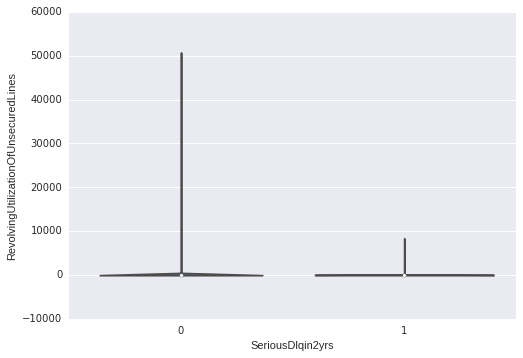

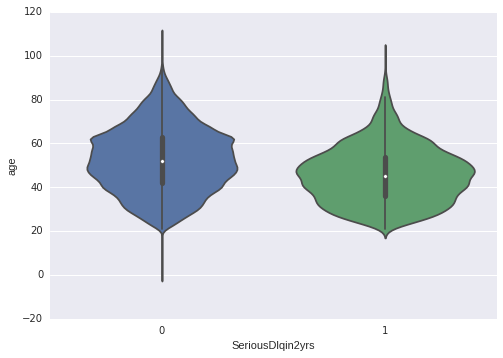

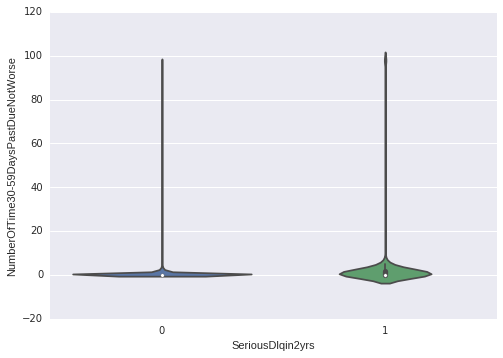

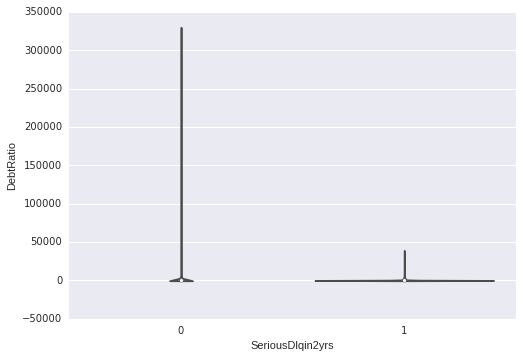

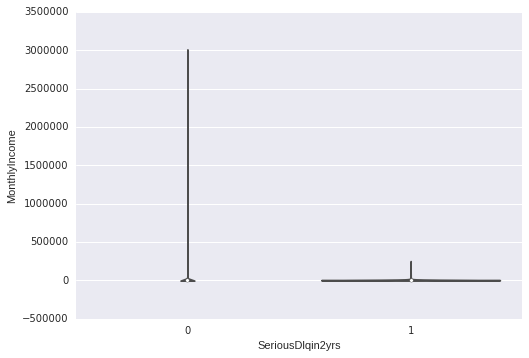

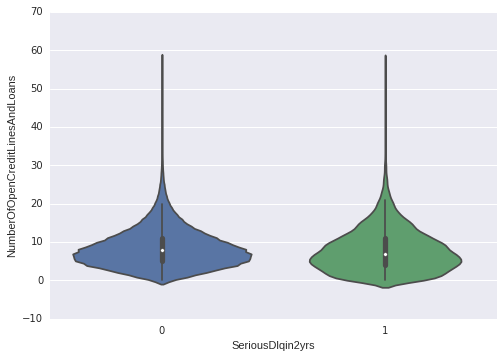

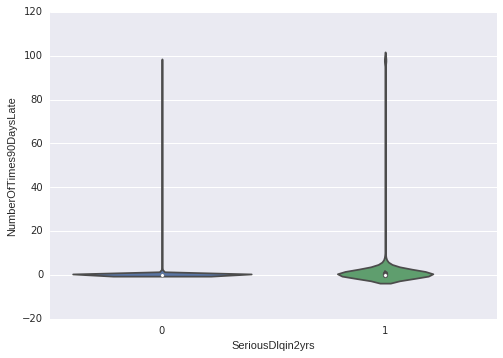

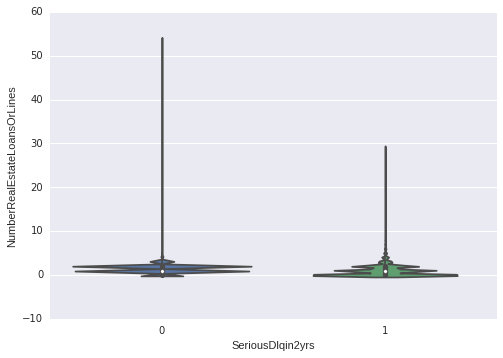

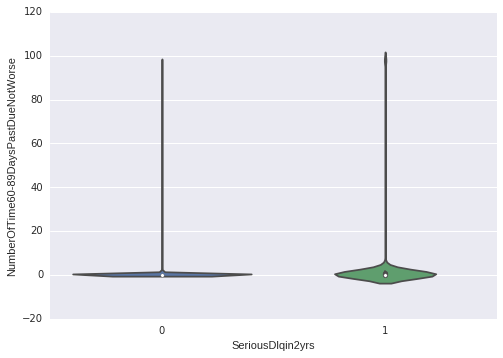

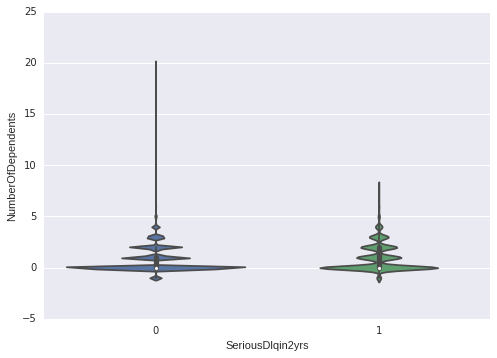

In [64]:
for f in [_ for _ in df.columns if _ not in ['id','SeriousDlqin2yrs']]:
    sns.violinplot(x="SeriousDlqin2yrs", y=f, data=df.fillna(-1))
    plt.show()

#  
#  
#  PCA/SVD (nan = -1)

### PCA

In [47]:
features_without_nan = [f for f in features if f not in features_with_nan]
                                      
pca = PCA(n_components=2)
#pca.fit()

components = pca.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]


In [48]:
print(pca.explained_variance_ratio_) 

[ 0.98513189  0.01479742]


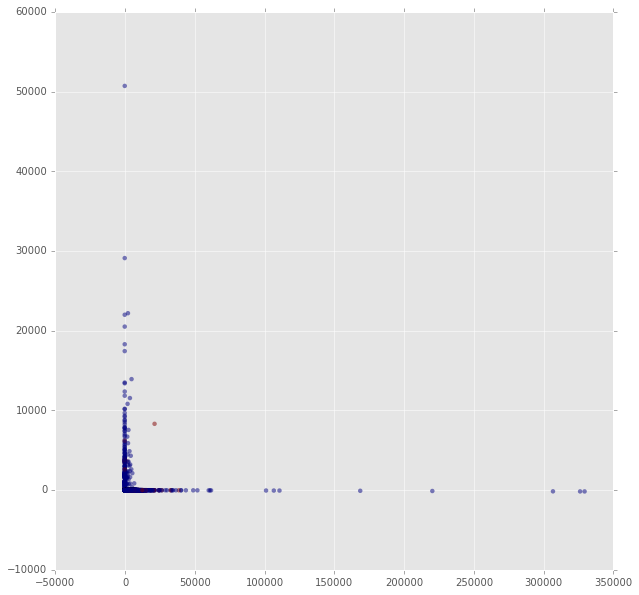

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()

### SVD

In [50]:
svd = TruncatedSVD(n_components=2)

components = svd.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]

In [51]:
print(svd.explained_variance_ratio_) 

[ 0.98511284  0.0147973 ]


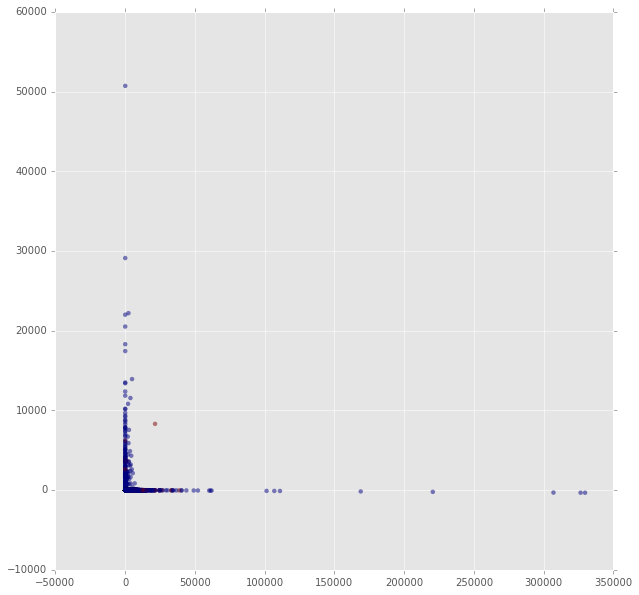

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()